<a href="https://colab.research.google.com/github/chandrusuresh/Hands-On-ML/blob/master/Ch8-DimensionalityReduction/DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Principal Component Analysis

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
img_size = np.uint16(np.sqrt(mnist["data"].shape[1]))
print(mnist.keys())
print('Size of image:',img_size)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
Size of image: 28


In [3]:
X,y = mnist["data"],mnist["target"].astype(np.uint8)
print("Shape of data:",X.shape)
print("Shape of target:",y.shape)

X_train,y_train,X_test,y_test = X[:60000,:],y[:60000],X[60000:,:],y[60000:]

Shape of data: (70000, 784)
Shape of target: (70000,)


### Visualize MNIST

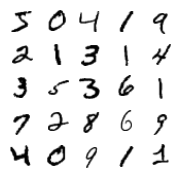

In [4]:
nRows = 5
fig,ax = plt.subplots(nRows,nRows,figsize=(3,3))
# fig.tight_layout(pad=0.001)
for i in range(nRows):
  for j in range(nRows):
    c = i*nRows + j
    ax[i][j].imshow(X[c].reshape(img_size,img_size),cmap='binary')
    ax[i][j].axis('off')
    # ax[i][j].set_title(str(y[c]))

Apply PCA to MNIST

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
Xtrain_reduced = pca.fit_transform(X_train)
print('Reduced Dimensions with full PCA:',Xtrain_reduced.shape[1])

X_full = pca.inverse_transform(Xtrain_reduced)

Reduced Dimensions with full PCA: 154


## Reconstruct data

In [6]:
pca_random = PCA(n_components=Xtrain_reduced.shape[1],svd_solver="randomized")
Xtrain_random_reduced = pca_random.fit_transform(X_train)
print('Reduced Dimensions with randomized PCA:',Xtrain_random_reduced.shape[1])

X_random = pca_random.inverse_transform(Xtrain_random_reduced)

Reduced Dimensions with randomized PCA: 154


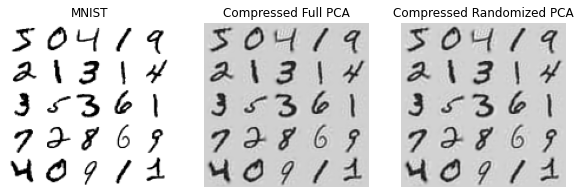

In [8]:
data = [X_train,X_full,X_random]
fig,ax = plt.subplots(1,3,figsize=(10,10))
titles = ['MNIST','Compressed Full PCA','Compressed Randomized PCA']
for k in range(3):
  Xp = data[k]
  mat = None
  for i in range(nRows):
    matc = None
    for j in range(nRows):
      c = i*nRows + j
      if matc is None:
        matc = Xp[c].reshape(img_size,img_size)
      else:
        matc = np.c_[matc,Xp[c].reshape(img_size,img_size)]
    if mat is None:
      mat = matc
    else:
      mat = np.r_[mat,matc]
  ax[k].imshow(mat,cmap='binary')
  ax[k].axis('off')
  ax[k].set_title(titles[k])